# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2021 elections results. This is the notebook for the first week.

In [1]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')



Running on CoLab


In [2]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!
import sys
#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 



# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [3]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First, we need to mount our local drive to the colab network

In [4]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "/Users/elkysandor/Desktop/huji yr3/static lab/"  


Mounted at /content/drive


In [5]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per city 2021.csv to votes per city 2021.csv
Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per ballot 2020.csv to votes per ballot 2020.csv
Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali.csv
Saving election_2020.csv to election_2020.csv


In [6]:
import io

data_type = "city" # "ballot"  # city
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe

In [7]:
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
print("{} votes in March 2021".format(df_2021_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')

421619 votes in March 2021 מעטפות חיצוניות 


In [8]:
# df_2021.reset_index(inplace=True)
df_2021.style.set_properties(**{'text-align': 'left'})

In [9]:
from matplotlib import pyplot as plt


In [10]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

total_votes = parties_votes_percents(df_2021, 0.001)  # total votes for each party

Create a dictionary mapping parties names to voting letters

In [11]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


Read the election results by ballot (not city)

In [12]:
if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally

In [13]:
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[8:-1]] # removing "metadata" columns
df_2021_ballots_raw = df_2021_ballots_raw.drop(index = "מעטפות חיצוניות")
df_2021_ind = df_2021_ballots_raw.set_index(["קלפי"], append=True)
df_2021_ballots= df_2021_ballots.drop(index = "מעטפות חיצוניות")
df_2021_ballots= df_2021_ballots.drop(columns=["כשרים","רק"])
over_trsh_21 = df_2021[parties_dict_2021.keys()]
over_trsh_21= over_trsh_21.drop("מעטפות חיצוניות")
df_2021_ind

סמל ועדה   ברזל  סמל ישוב  ריכוז  ...  רק  שס   ת  Unnamed: 50
שם ישוב   קלפי                                    ...                         
אבירים    1.0          6   3238      1220      1  ...   0   1   8          NaN
אדירים    1.0          5   1788       113      1  ...   0  61   6          NaN
אושה      1.0          8   4113       278      1  ...   0   0  15          NaN
אחווה     1.0         17  10449      1157      1  ...   0   2   8          NaN
איבים     1.0         17  10450       338      1  ...   0   1   0          NaN
...                  ...    ...       ...    ...  ...  ..  ..  ..          ...
קורנית    1.0          6   3140      1179      1  ...   0   0  15          NaN
שורשים    1.0          6   3143      1235      1  ...   0   0  25          NaN
שכניה     1.0          6   3144      1160      1  ...   0   1  36          NaN
שער אפרים 1.1         10   5631       661      1  ...   0  15  18          NaN
          1.2         10   5632       661      1  ...   0  28  27          NaN

[12127 rows x 49 columns]

In [14]:
# Make corrections to the votes 
# Correct for voting turnout in cities/ballots (from lab2)
# df - matrix of voters for each party and each city
# v - vector of total bz"b for each city 
# Assume that for each city, the proportion for each party is the same fofr voters and non-voters
def simple_turnout_correction(df, v):
    p = df.sum().div(df.sum().sum())  # votes without correction
    exp_df = pd.DataFrame().reindex_like(df)
    if v.size == df.shape[0]:
        v_mat = pd.concat([alpha] * (df.shape[1]), axis=1)
        exp_df = np.random.binomial(df,v_mat)
    elif v.size == df.shape[1]:
        v_mat = pd.DataFrame([v]*(df.shape[0]))
        exp_df = np.random.binomial(df,v_mat)
    else:
        v_mat = v
        exp_df = np.random.binomial(df,v_mat)
    # q_hat = ...
    return pd.DataFrame(exp_df,columns=df.columns,index = df.index)

In [15]:
def simulation(num_simu,df,v):
    df_estimators = pd.DataFrame(columns = df.columns)
    df_qj_hat  = pd.DataFrame(columns = df.columns)
    for i in range(num_simu):
        simu_df = simple_turnout_correction(df,v)
        norm_df = simu_df.mul(normalized_vec,axis = 0)
        p_j = simu_df.sum().div(simu_df.sum().sum())
        q_j_hat = norm_df.sum().div(norm_df.sum().sum())
        df_pj_estimators = df_estimators.append(p_j,ignore_index=True)
        df_qj_hat = df_qj_hat.append(q_j_hat,ignore_index=True)
    return df_pj_estimators,df_qj_hat

In [16]:
# from elections_functions import *
from sklearn.decomposition import PCA
# scikit-learn

In [17]:
def normalize(x):
  return x/np.linalg.norm(x)

In [18]:
# df_2020_raw = pd.read_csv(io.BytesIO(uploaded['election_2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# df_2020_raw = df_2020_raw.drop("מעטפות חיצוניות")
# nine_big = ["טב", "ל", "אמת", "ג", "שס", "ודעם", "פה", "מחל", "נץ"]
# df_2020 = df_2020_raw.loc[:,nine_big]
# df_2020["מרצ"] = df_2020["אמת"]*0.5
# df_2020["אמת"] = df_2020["אמת"]*0.5
# df_2020["עם"] = df_2020["ודעם"]*0.4
# df_2020["ודעם"] = df_2020["ודעם"]*0.6
# df_2020["ת"] = df_2020["מחל"]*0.167
# df_2020["מחל"] = df_2020["מחל"]*0.833
# df_2020["כן"] = df_2020["פה"]*0.333
# df_2020["פה"] = df_2020["פה"]*0.667
# df_2020["ב"] = df_2020["טב"]*0.6
# df_2020["ט"] = df_2020["טב"]*0.4
# df_2020["ט"] = df_2020["ט"]+df_2020["נץ"]
# df_2020 = df_2020.drop(columns = "נץ")
# df_2020 = df_2020.drop(columns = "טב")
# df_all = pd.concat([over_trsh_21.sort_index(),df_2020.sort_index()])
# df_all = df_all.drop('רותם')
# df_all = df_all.drop('פלך')
# df_all = df_all.drop('באר מילכה')
# df_all = df_all.drop('מעלה שומרון')
# df_all = df_all.drop('עמיחי')

# Solution 7

# 1

# a

In [19]:
df_2020_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
#df_2020_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2020.csv',  encoding = 'iso-8859-8', index_col=['שם ישוב',"קלפי"])  

In [20]:
#check_merg = df_2021_ballots_raw.merge(df_2020_ballots_raw, how = 'inner',right_on = ["שם ישוב", "קלפי"], left_on = ["שם ישוב", "קלפי"])
# before_merge = df_2021_ballots_raw.set_index(["סמל ישוב", "קלפי"]).join(df_2020_ballots_raw.set_index(["סמל ישוב", "קלפי"]),how = "inner", rsuffix = "-2020")
before_merge = pd.concat([df_2021_ballots_raw.set_index(["קלפי"],append=True),df_2020_ballots_raw.set_index(["קלפי"],append=True)])
needed_idx = before_merge.index.value_counts()[before_merge.index.value_counts()==2]
needed_idx.index
final_merge = before_merge.loc[needed_idx.index]
final_merge.dropna(how = "all", axis = "columns", inplace = True)
final_merge = final_merge.sort_index()
final_merge_partys = final_merge.iloc[:,9:]
final_merge_partys.head(10)


אמת    ב  ג  ודעם  ז  זץ  ...    ת   זך   טב   נז   נץ   נק
שם ישוב          קלפי                            ...                              
אבו גוש          3.0     3  0.0  0    98  0   0  ...  0.0  NaN  NaN  NaN  NaN  NaN
                 3.0     3  NaN  0   258  0   0  ...  NaN  0.0  1.0  0.0  1.0  0.0
                 5.0     3  0.0  0    80  0   0  ...  0.0  NaN  NaN  NaN  NaN  NaN
                 5.0    11  NaN  0   201  0   0  ...  NaN  0.0  1.0  0.0  1.0  1.0
                 8.0     0  0.0  2    91  0   0  ...  0.0  NaN  NaN  NaN  NaN  NaN
                 8.0     5  NaN  3   205  0   0  ...  NaN  0.0  1.0  0.0  0.0  1.0
אבו עבדון שבט    1.0     0  0.0  0     3  0   0  ...  0.0  NaN  NaN  NaN  NaN  NaN
                 1.0     0  NaN  0    40  0   0  ...  NaN  0.0  0.0  0.0  0.0  0.0
אבו קרינאת יישוב 1.0     0  0.0  0    10  0   0  ...  2.0  NaN  NaN  NaN  NaN  NaN
                 1.0     9  NaN  0   264  0   0  ...  NaN  0.0  1.0  0.0  0.0  0.0

[10 rows x 44 columns]

In [21]:
for_norm = final_merge_partys.fillna(0)
df_norm = for_norm.div(for_norm.sum(axis = 1),axis=0)

# b

In [22]:
nine_big = ["טב", "ל", "אמת", "ג", "שס", "ודעם", "פה", "מחל", "נץ"]
df_2020_ballots_big_par = df_2020_ballots_raw.set_index(["קלפי"], append=True)
df_2020_ballots_big_par = df_2020_ballots_big_par.loc[:,nine_big]
df_2020_ballots_big_par["מרצ"] = df_2020_ballots_big_par["אמת"]*0.5
df_2020_ballots_big_par["אמת"] = df_2020_ballots_big_par["אמת"]*0.5
df_2020_ballots_big_par["עם"] = df_2020_ballots_big_par["ודעם"]*0.4
df_2020_ballots_big_par["ודעם"] = df_2020_ballots_big_par["ודעם"]*0.6
df_2020_ballots_big_par["ת"] = df_2020_ballots_big_par["מחל"]*0.167
df_2020_ballots_big_par["מחל"] = df_2020_ballots_big_par["מחל"]*0.833
df_2020_ballots_big_par["כן"] = df_2020_ballots_big_par["פה"]*0.333
df_2020_ballots_big_par["פה"] = df_2020_ballots_big_par["פה"]*0.667
df_2020_ballots_big_par["ב"] = df_2020_ballots_big_par["טב"]*0.6
df_2020_ballots_big_par["ט"] = df_2020_ballots_big_par["טב"]*0.4
df_2020_ballots_big_par["ט"] = df_2020_ballots_big_par["ט"]+df_2020_ballots_big_par["נץ"]
df_2020_ballots_big_par = df_2020_ballots_big_par.drop(columns = "נץ")
df_2020_ballots_big_par = df_2020_ballots_big_par.drop(columns = "טב")


In [23]:
df_city_2020 = df_2020_ballots_big_par.groupby("שם ישוב").sum()
for_small = df_2020_ballots_raw.groupby("שם ישוב").sum()
small_2020 = for_small.loc[for_small["בזב"]<=50000].index
small_city = df_city_2020.loc[small_2020,parties_dict_2021.keys()]
df_bal_2020 = df_2020_ballots_big_par.loc[small_2020]

In [24]:
idx_20 = df_bal_2020.index
norm_df_bal = df_bal_2020.reset_index(drop=True).div(df_bal_2020.reset_index(drop=True).sum(axis=1),axis=0)
norm_df_bal = norm_df_bal.set_index(idx_20)
norm_df_bal = norm_df_bal[parties_dict_2021]
norm_df_city = small_city.div(small_city.sum(axis = 1),axis = 0)
distance_df_2020 = norm_df_bal.copy(deep=True)
for city in norm_df_city.index:
  distance_df_2020.loc[city] = (norm_df_bal.loc[city,:,:]-norm_df_city.loc[city])**2
dist_20 = distance_df_2020.sum(axis=1).nlargest(10)
dist_20

שם ישוב       קלפי
חצור הגלילית  3.0     0.934467
קרית גת       74.0    0.804989
נוף הגליל     60.0    0.679497
צפת           40.0    0.641391
טבריה         57.0    0.579761
מגדל העמק     40.0    0.489412
קרית גת       72.0    0.487550
מעלותתרשיחא   7.0     0.408965
              25.0    0.402781
גבעת זאב      20.3    0.391074
dtype: float64

In [25]:
for_small_21 = df_2021_ballots_raw.groupby("שם ישוב").sum()
small_2021 = for_small_21.loc[for_small_21["בזב"]<=50000]
small_city_21 = over_trsh_21.loc[small_2021.index]
df_bal_2021 = df_2021_ballots_raw.set_index(["קלפי"], append=True).loc[small_2021.index,:,:]
df_bal_2021 = df_bal_2021[parties_dict_2021]

In [26]:
idx_21 = df_bal_2021.index
norm_df_bal_21 = df_bal_2021.reset_index(drop=True).div(df_bal_2021.reset_index(drop=True).sum(axis=1),axis=0)
norm_df_bal_21 = norm_df_bal_21.set_index(idx_21)
norm_df_city_21 = small_city_21.div(small_city_21.sum(axis = 1),axis = 0)
distance_df_2021 = norm_df_bal_21.copy(deep=True)
for city in norm_df_city_21.index:
  distance_df_2021.loc[city] = (norm_df_bal_21.loc[city,:,:]-norm_df_city_21.loc[city])**2
dist_21 = distance_df_2021.sum(axis=1).nlargest(10)
dist_21

שם ישוב      קלפי
נוף הגליל    60.0    0.721473
מעלותתרשיחא  3.1     0.603070
             3.2     0.547861
טבריה        57.0    0.530551
מגדל העמק    40.1    0.499959
נוף הגליל    1.2     0.496551
עכו          41.0    0.473783
מעלותתרשיחא  7.1     0.459632
קרית גת      72.2    0.455841
נוף הגליל    5.1     0.450178
dtype: float64

# c

In [27]:
size = for_norm.shape[0]
location21 = np.arange(0,size,2)
location20 = np.arange(1,size,2)
df_norm_2021 = for_norm.iloc[location21]
df_norm_2020 = for_norm.iloc[location20]
big_df_norm_2021 = df_norm_2021.loc[:,parties_dict_2021.keys()]
df_2020_ballots_big = df_norm_2020.copy(deep=True)
df_2020_ballots_big["מרצ"] = df_2020_ballots_big["אמת"]*0.5
df_2020_ballots_big["אמת"] = df_2020_ballots_big["אמת"]*0.5
df_2020_ballots_big["עם"] = df_2020_ballots_big["ודעם"]*0.4
df_2020_ballots_big["ודעם"] = df_2020_ballots_big["ודעם"]*0.6
df_2020_ballots_big["ת"] = df_2020_ballots_big["מחל"]*0.167
df_2020_ballots_big["מחל"] = df_2020_ballots_big["מחל"]*0.833
df_2020_ballots_big["כן"] = df_2020_ballots_big["פה"]*0.333
df_2020_ballots_big["פה"] = df_2020_ballots_big["פה"]*0.667
df_2020_ballots_big["ב"] = df_2020_ballots_big["טב"]*0.6
df_2020_ballots_big["ט"] = df_2020_ballots_big["טב"]*0.4
df_2020_ballots_big["ט"] = df_2020_ballots_big["ט"]+df_2020_ballots_big["נץ"]
df_2020_ballots_big = df_2020_ballots_big.drop(columns = "נץ")
df_2020_ballots_big = df_2020_ballots_big.drop(columns = "טב")
df_2020_ballots_big.head()
big_df_norm_2020 = df_2020_ballots_big.loc[:,parties_dict_2021.keys()]

In [28]:
df_2020_ballots_norm = big_df_norm_2020.div(big_df_norm_2020.sum(axis = 1),axis = 0)
df_2021_ballots_norm = big_df_norm_2021.div(big_df_norm_2021.sum(axis = 1),axis = 0)
max_square = ((df_2020_ballots_norm-df_2021_ballots_norm)**2).sum(axis=1).nlargest(10)
max_square

שם ישוב    קלפי 
נווה       1.0      1.009091
תל שבע     12.0     0.598747
קצר אסר    1.0      0.597351
ירושלים    623.0    0.596763
אבו תלול   1.0      0.587749
בני נצרים  1.0      0.583428
אטרש שבט   3.0      0.573780
ערערהבנגב  8.0      0.554944
שומריה     1.0      0.554455
אבו תלול   2.0      0.554355
dtype: float64

# e

In [29]:
perc = ((final_merge.iloc[location20]['מצביעים']/(final_merge.iloc[location20]['בזב']))+(final_merge.iloc[location21]['מצביעים']/(final_merge.iloc[location21]['בזב'])))/2
vote_percent = perc.nlargest(10)
vote_percent

שם ישוב   קלפי
יסודות    1.0     0.917590
אליאב     1.0     0.897747
זמרת      1.0     0.893331
רחלים     1.0     0.888997
גני טל    1.0     0.888031
נטע       1.0     0.885758
סנסנה     1.0     0.878813
רכסים     11.0    0.876724
נגוהות    1.0     0.872972
גבעת זאב  20.2    0.872616
dtype: float64

# f

In [30]:
disc = ((final_merge.iloc[location20]['פסולים']/(final_merge.iloc[location20]['מצביעים']))+(final_merge.iloc[location21]['פסולים']/(final_merge.iloc[location21]['מצביעים'])))/2
disc_percent = disc.nlargest(10)
disc_percent

שם ישוב       קלפי 
באר שבע       71.1     0.047904
ירושלים       488.0    0.041799
אום אלפחם     52.0     0.037803
נוף הגליל     59.0     0.036013
מאיר שפיה     1.0      0.035760
עין נקובא     3.0      0.034097
קרית ים       21.0     0.033876
נוף הגליל     19.0     0.032926
עכו           37.0     0.031466
סואעד חמרייה  1.0      0.030773
dtype: float64

# g


In [31]:
def plot(df):
    bals = df.index
    names = [parties_dict_2021[name] for name in list(parties_dict_2021.keys())]
    rev_names = [party[::-1] for party in names]
    fig , axes = plt.subplots(figsize = (20,8),nrows = 2,ncols = 5)
    axes = axes.flat
    party_con =0
    for n,bal in enumerate(bals):
        bals_freq20 = df_2020_ballots_norm.loc[bal]
        bals_freq21 = df_2021_ballots_norm.loc[bal]
        ball21 = axes[n].bar(np.arange(13),list(bals_freq21),0.3,color = "red")
        ball20 = axes[n].bar(np.arange(13)+ 0.3,list(bals_freq20),0.3,color = "black")
        axes[n].set_title(f" {bal[0][::-1]}  {bal[1]}")
        axes[n].legend((ball21[0],ball20[0]), ("2021", "2020"))
        axes[n].set_xticks(np.arange(13),)
        axes[n].set_xticklabels(rev_names,rotation=90)
    fig.tight_layout()    
    plt.show

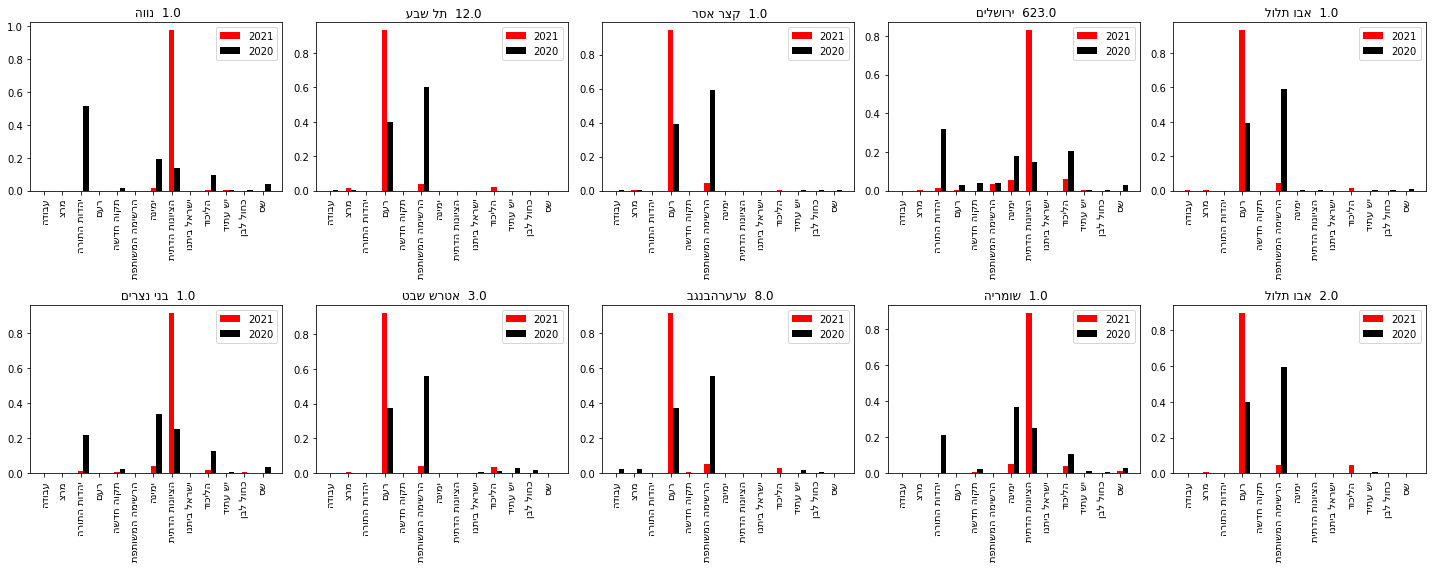

In [32]:
plot(max_square)

All of the changes are between the same group of people, only people change the votes between the arabs, 'DATI' votes.

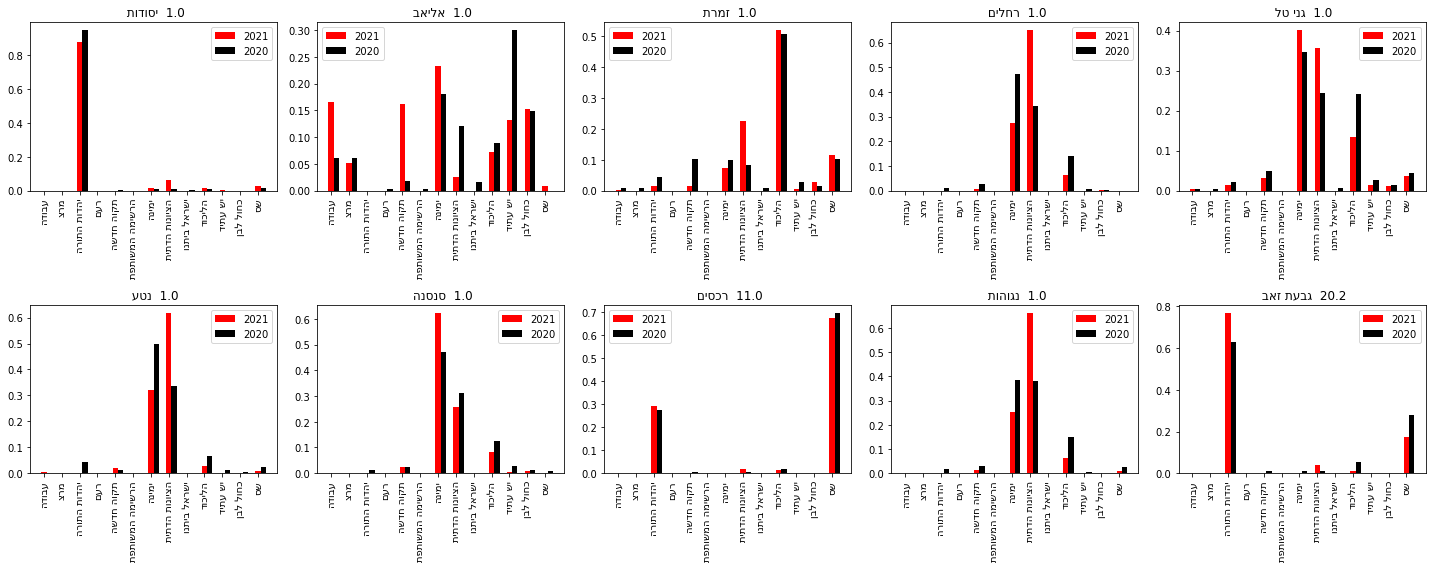

In [33]:
plot(vote_percent)

we can see that most of the high citis that vote are cities that are voting to mostly right handed parties. 

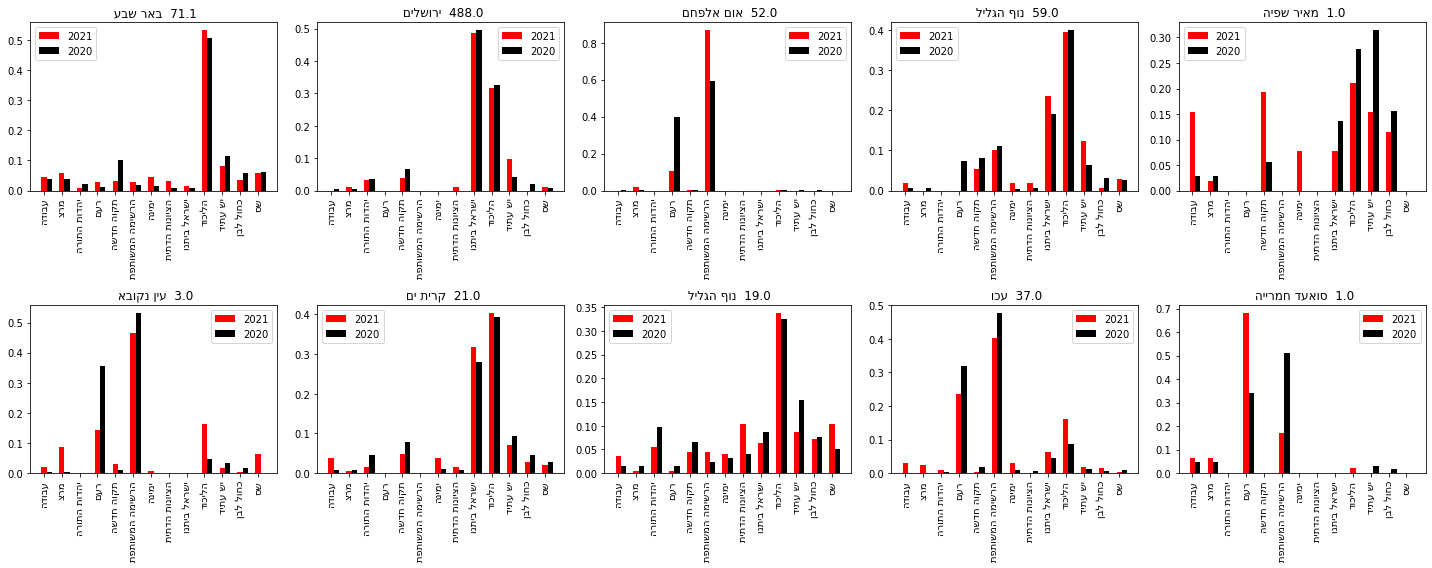

In [34]:
plot(disc_percent)

most of the cities have high parcantage of arabs.

In [35]:
def plot_b_20(df):
    bals = df.index
    names = [parties_dict_2021[name] for name in list(parties_dict_2021.keys())]
    rev_names = [party[::-1] for party in names]
    fig , axes = plt.subplots(figsize = (20,8),nrows = 2,ncols = 5)
    axes = axes.flat
    party_con =0
    for n,bal in enumerate(bals):
        bals = norm_df_bal.loc[bal]
        city = norm_df_city.loc[bal[0]]
        kosher = for_small["כשרים"]
        kosher = kosher.loc[bal[0]]
        bazab = for_small["בזב"]
        bazab = bazab.loc[bal[0]]
        city_bar = axes[n].bar(np.arange(13),list(city),0.3,color = "red")
        bal_bar = axes[n].bar(np.arange(13)+ 0.3,list(bals),0.3,color = "black")
        axes[n].set_title(f" {bal[0][::-1]}  {bal[1]} \n {kosher} :םירשכ \n {bazab} :בזב ")
        axes[n].legend((city_bar[0],bal_bar[0]), ("בושי", "יפלק"), loc='upper right')
        axes[n].set_xticks(np.arange(13),)
        axes[n].set_xticklabels(rev_names,rotation=90)
    fig.tight_layout()    
    plt.show

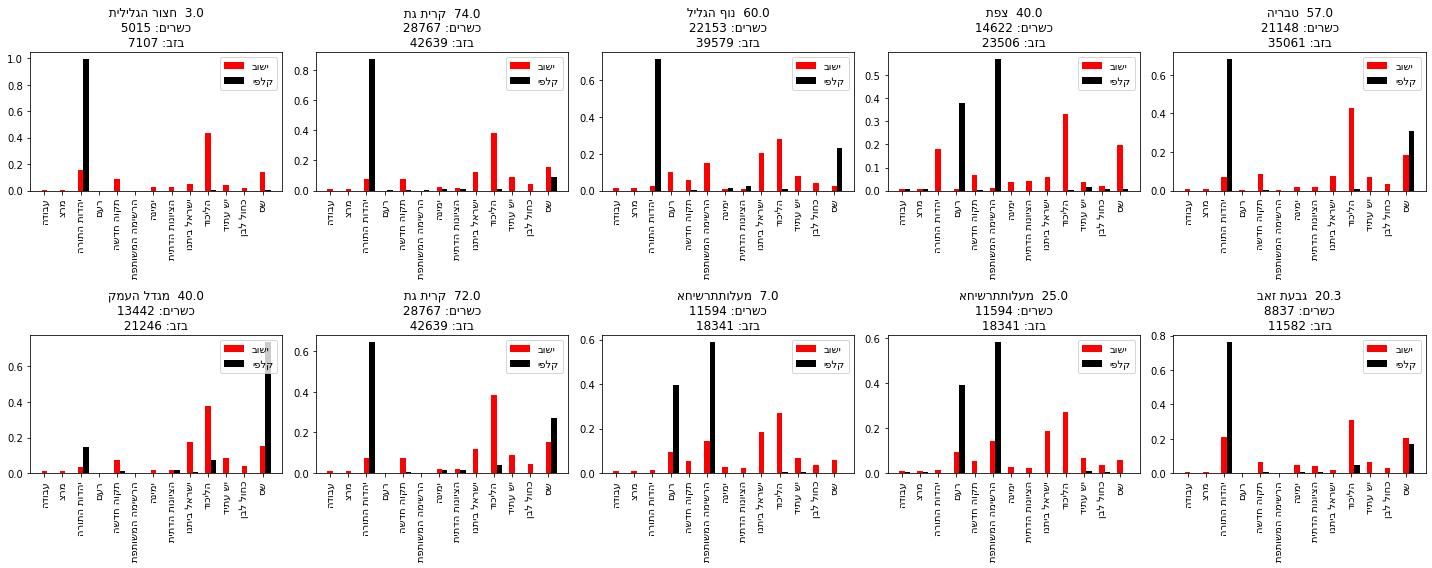

In [36]:
plot_b_20(dist_20)

most of the ballots that had a big squared value had been voted in them to "יהדות התורה" or to "הרשימה המשותפת", or to "רעם", or to "שס"
We can assume that it happened in mixed city, where the population is diversed.

In [37]:
def plot_b_21(df):
    bals = df.index
    names = [parties_dict_2021[name] for name in list(parties_dict_2021.keys())]
    rev_names = [party[::-1] for party in names]
    fig , axes = plt.subplots(figsize = (20,8),nrows = 2,ncols = 5)
    axes = axes.flat
    party_con =0
    for n,bal in enumerate(bals):
        bals = norm_df_bal_21.loc[bal]
        city = norm_df_city_21.loc[bal[0]]
        kosher = small_2021["כשרים"]
        kosher = kosher.loc[bal[0]]
        bazab = small_2021["בזב"]
        bazab = bazab.loc[bal[0]]
        city_bar = axes[n].bar(np.arange(13),list(city),0.3,color = "red")
        bal_bar = axes[n].bar(np.arange(13)+ 0.3,list(bals),0.3,color = "black")
        axes[n].set_title(f" {bal[0][::-1]}  {bal[1]} \n {kosher} :םירשכ \n {bazab} :בזב ")
        city_bar = axes[n].bar(np.arange(13),list(city),0.3,color = "red")
        bal_bar = axes[n].bar(np.arange(13)+ 0.3,list(bals),0.3,color = "black")
        axes[n].legend((city_bar[0],bal_bar[0]), ("בושי", "יפלק"))
        axes[n].set_xticks(np.arange(13),)
        axes[n].set_xticklabels(rev_names,rotation=90)
    fig.tight_layout()    
    plt.show

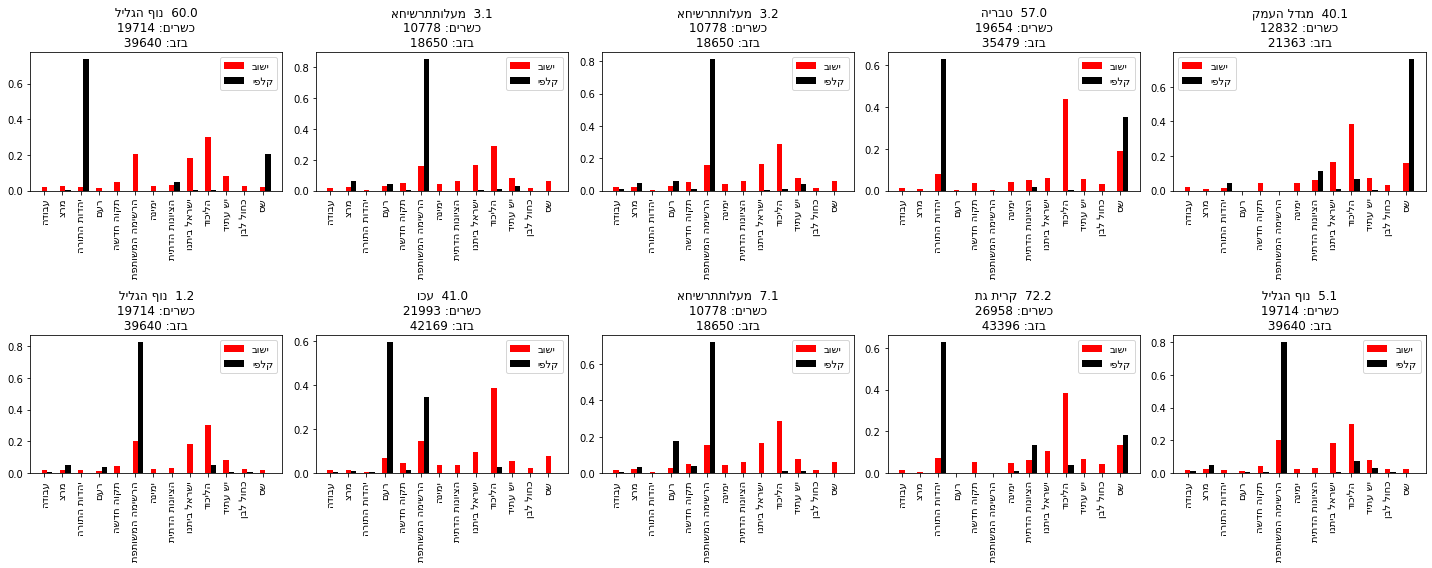

In [38]:
plot_b_21(dist_21)

most of the ballots that had a big squared value had been voted in them to "יהדות התורה" or to "הרשימה המשותפת", or to "רעם", or to "שס"
We can assume that it happened in mixed city, where the population is diversed.

# 2

a



In [39]:
org_columns = norm_df_bal_21[parties_dict_2021]
emperical_cov = np.cov(org_columns.T)

In [40]:
def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))

    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=90)
    ax.set_yticklabels(rev_names)
    ax.set_title("empirical parties covariance")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

Index(['אמת', 'מרצ', 'ג', 'עם', 'ת', 'ודעם', 'ב', 'ט', 'ל', 'מחל', 'פה', 'כן',
       'שס'],
      dtype='object')

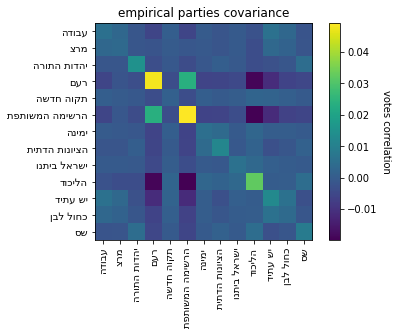

In [41]:
over_treshold = [parties_dict_2021[x] for x in org_columns.columns]
heatmap_corr(emperical_cov, over_treshold)
org_columns.columns

# b

In [42]:
def Mahalonbis_metric(x,y):
    vec = np.array(x-y)
    inv_cov = np.linalg.inv(emperical_cov)
    dist = vec@inv_cov@vec.T
    return np.sqrt(dist)

In [43]:
mahalonbis_df_2020 = pd.Series(np.zeros(norm_df_bal.shape[0]),norm_df_bal.index).copy(deep=True)
for city,num in norm_df_bal.index:
  mahalonbis_df_2020.loc[(city,num)] = Mahalonbis_metric(np.array(norm_df_bal.loc[city,num,:]),np.array(norm_df_city.loc[city,:]))
dist_20_M = mahalonbis_df_2020.nlargest(10)
dist_20_M

שם ישוב       קלפי
חצור הגלילית  3.0     8.857335
מגדל העמק     40.0    8.279110
קרית גת       74.0    7.823823
ביתר עילית    4.0     6.813097
נשר           32.0    6.752595
ביתר עילית    33.3    6.601056
נוף הגליל     60.0    6.229984
אלעד          27.0    6.212027
דימונה        91.0    5.888151
ביתר עילית    33.1    5.797066
dtype: float64

In [44]:
mahalonbis_df_2021 = pd.Series(np.zeros(norm_df_bal_21.shape[0]),norm_df_bal_21.index).copy(deep=True)
for city,num in norm_df_bal_21.index:
  mahalonbis_df_2021.loc[(city,num)] = Mahalonbis_metric(norm_df_bal_21.loc[city,num,:],norm_df_city_21.loc[city])
dist_21_M = mahalonbis_df_2021.nlargest(10)
dist_21_M

שם ישוב   קלפי
כסראסמיע  3.2     15.614908
זרזיר     9.1     15.481842
סאגור     3.1     12.715511
זרזיר     9.3     12.054487
חורפיש    5.1     11.981136
דימונה    90.0    11.011417
יאנוחגת   4.2     10.324669
          3.2      9.959653
כסראסמיע  4.3      9.422915
רהט       22.1     8.835281
dtype: float64

In [45]:
mahalonbis_df_all = pd.Series(np.zeros(df_2021_ballots_norm.shape[0]),df_2021_ballots_norm.index).copy(deep=True)
for city,num in df_2021_ballots_norm.index:
  mahalonbis_df_all.loc[(city,num)] = Mahalonbis_metric(df_2021_ballots_norm.loc[city,num,:],df_2020_ballots_norm.loc[city,num,:])
dist_all = mahalonbis_df_all.nlargest(10)
dist_all

שם ישוב         קלפי 
נווה            1.0      12.847716
אלוני יצחק      1.0      11.820054
בני נצרים       1.0      11.701778
שומריה          1.0      11.635734
כרם יבנה ישיבה  1.0      10.873766
אלון מורה       1.0      10.545692
משכיות          1.0      10.447912
פני חבר         1.0      10.113208
מיצר            1.0      10.069515
ירושלים         623.0     9.765796
dtype: float64

We can see that the suspicious ballots had totally changed.
Now we can see that both ways gives us different patterns. From the first question we can see suspicious ballots as ballots that had votes for parties with high correlation that makes sense due to diversed cities. And on the other hand in this question we are looking at ballots that the votes had change in a way of completely different parties.
